<a href="https://colab.research.google.com/github/Jun-Liu-291/cat-dog-CNN/blob/master/cat%26dog_v5_regularzation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import layers
from keras import models
from keras import regularizers

# no regularzation
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import os

batch_size = 20
epoch_lenth = 30
image_size = (150, 150)
train_step_per_epochs = int(2000 / batch_size)
validation_step_per_epochs = int(1000 / batch_size)

# cats and dogs data set downloaded from www.kaggle.com/c/dogs-vs-cats/data
# Using make_small_dataset.py separate small data set
# 2000 images as Training set
# 1000 images as Validation set
# 1000 images as Test set
train_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/train'
validation_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/validation'

# normoalize pixel values
# no data augmentation 
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# create training set labels based on different direction
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary')

# create validation set labels based on different direction
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from keras import optimizers
import tensorflow as tf

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
# try to traing this simple model 
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_step_per_epochs,
    epochs = epoch_lenth,
    validation_data=validation_generator,
    validation_steps = validation_step_per_epochs
)

Epoch 1/30
100/100 [==============================] - 112s 1s/step - loss: 0.6873 - acc: 0.5435 - val_loss: 0.6814 - val_acc: 0.6130
Epoch 2/30
100/100 [==============================] - 106s 1s/step - loss: 0.6608 - acc: 0.5995 - val_loss: 0.6367 - val_acc: 0.5990
Epoch 3/30
100/100 [==============================] - 106s 1s/step - loss: 0.6270 - acc: 0.6510 - val_loss: 0.4939 - val_acc: 0.6350
Epoch 4/30
100/100 [==============================] - 106s 1s/step - loss: 0.5902 - acc: 0.6920 - val_loss: 0.8380 - val_acc: 0.6110
Epoch 5/30
100/100 [==============================] - 107s 1s/step - loss: 0.5544 - acc: 0.7095 - val_loss: 0.6705 - val_acc: 0.6550
Epoch 6/30
100/100 [==============================] - 111s 1s/step - loss: 0.5230 - acc: 0.7380 - val_loss: 0.6099 - val_acc: 0.6390
Epoch 7/30
100/100 [==============================] - 106s 1s/step - loss: 0.4960 - acc: 0.7620 - val_loss: 0.6241 - val_acc: 0.7040
Epoch 8/30
100/100 [==============================] - 106s 1s/step - 

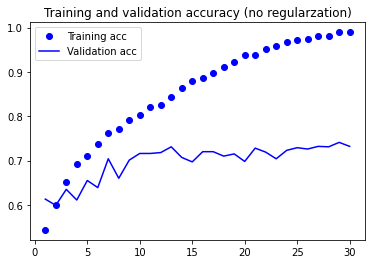

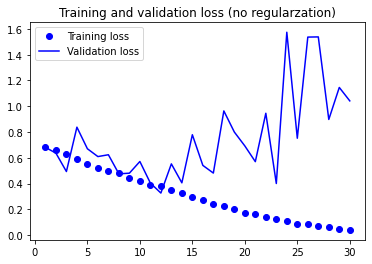

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy (no regularzation)')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss (no regularzation)')
plt.legend()
plt.show()

In [ ]:
from keras import layers
from keras import models
from keras import regularizers

# try kernel regularizer
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3), kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
from keras import optimizers
import tensorflow as tf

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])

In [ ]:
# try to traing this simple model 
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_step_per_epochs,
    epochs = epoch_lenth,
    validation_data=validation_generator,
    validation_steps = validation_step_per_epochs
)

Epoch 1/30
100/100 [==============================] - 107s 1s/step - loss: 0.8013 - acc: 0.5205 - val_loss: 0.6871 - val_acc: 0.5700
Epoch 2/30
100/100 [==============================] - 106s 1s/step - loss: 0.6992 - acc: 0.5815 - val_loss: 0.5720 - val_acc: 0.6070
Epoch 3/30
100/100 [==============================] - 106s 1s/step - loss: 0.6663 - acc: 0.6555 - val_loss: 0.5493 - val_acc: 0.6530
Epoch 4/30
100/100 [==============================] - 106s 1s/step - loss: 0.6038 - acc: 0.6910 - val_loss: 0.7210 - val_acc: 0.7100
Epoch 5/30
100/100 [==============================] - 106s 1s/step - loss: 0.5770 - acc: 0.7195 - val_loss: 0.6708 - val_acc: 0.7010
Epoch 6/30
100/100 [==============================] - 107s 1s/step - loss: 0.5562 - acc: 0.7330 - val_loss: 0.4348 - val_acc: 0.7230
Epoch 7/30
100/100 [==============================] - 107s 1s/step - loss: 0.5241 - acc: 0.7550 - val_loss: 0.3515 - val_acc: 0.7620
Epoch 8/30
100/100 [==============================] - 106s 1s/step - 

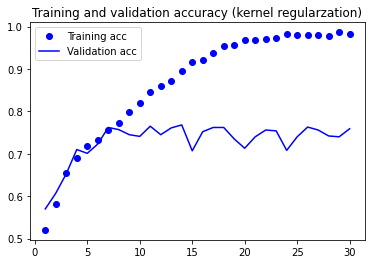

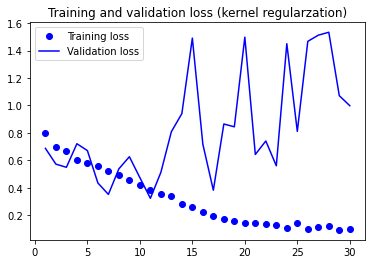

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy (kernel regularzation)')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss (kernel regularzation)')
plt.legend()
plt.show()

Kernal regularzation summary:
1. the model with kernal regularzation converge in less epochs: a = wx + b, since we add l2 norm of w to loss function, kernal regularzation decrease the in fluence of training data to our model. Therefore, the model converge in a quicker speed with kernal regularzation.

2. the final training loss increase a little and final training accuracy dicrease a little; var accuarcy increase a little. So it solve the overfitting problem to some extent. we need increase the kernal regularzation scale.

In [ ]:
from keras import layers
from keras import models
from keras import regularizers

# try bias regularizer
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3), bias_regularizer=regularizers.l2(1e-4)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu', bias_regularizer=regularizers.l2(1e-4)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu', bias_regularizer=regularizers.l2(1e-4)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu', bias_regularizer=regularizers.l2(1e-4)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu', bias_regularizer=regularizers.l2(1e-4)))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
# try to traing this simple model 
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_step_per_epochs,
    epochs = epoch_lenth,
    validation_data=validation_generator,
    validation_steps = validation_step_per_epochs
)

Epoch 1/30
100/100 [==============================] - 1733s 17s/step - loss: 0.6911 - acc: 0.5305 - val_loss: 0.6587 - val_acc: 0.6230
Epoch 2/30
100/100 [==============================] - 105s 1s/step - loss: 0.6547 - acc: 0.5995 - val_loss: 0.6580 - val_acc: 0.6300
Epoch 3/30
100/100 [==============================] - 105s 1s/step - loss: 0.6040 - acc: 0.6770 - val_loss: 0.8313 - val_acc: 0.5220
Epoch 4/30
100/100 [==============================] - 105s 1s/step - loss: 0.5663 - acc: 0.7090 - val_loss: 0.7360 - val_acc: 0.6760
Epoch 5/30
100/100 [==============================] - 105s 1s/step - loss: 0.5353 - acc: 0.7285 - val_loss: 0.5517 - val_acc: 0.6810
Epoch 6/30
100/100 [==============================] - 105s 1s/step - loss: 0.5042 - acc: 0.7440 - val_loss: 0.5133 - val_acc: 0.7200
Epoch 7/30
100/100 [==============================] - 105s 1s/step - loss: 0.4750 - acc: 0.7740 - val_loss: 0.5394 - val_acc: 0.7150
Epoch 8/30
100/100 [==============================] - 105s 1s/step 

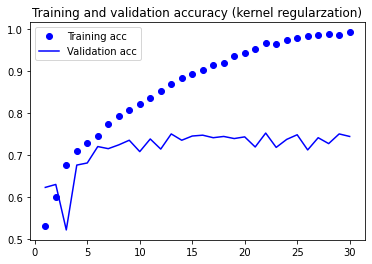

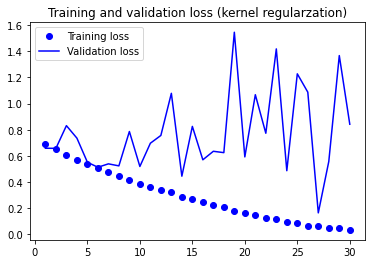

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy (kernel regularzation)')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss (kernel regularzation)')
plt.legend()
plt.show()

These two plt should be bias regularzation

Bias regularzation summary:

1. the converge speeds are same as no regularzation model. Since regularzation on bias b has no influence on our input data x.

2. bias also has contribution to solve overfitting problem.



In [ ]:
from keras import layers
from keras import models
from keras import regularizers

# try activity regularizer
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3), activity_regularizer=regularizers.l2(1e-4)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu', activity_regularizer=regularizers.l2(1e-4)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu', activity_regularizer=regularizers.l2(1e-4)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu', activity_regularizer=regularizers.l2(1e-4)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu', activity_regularizer=regularizers.l2(1e-4)))
model.add(layers.Dense(1, activation = 'sigmoid'))

Using TensorFlow backend.


In [ ]:
# try to traing this simple model 
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_step_per_epochs,
    epochs = epoch_lenth,
    validation_data=validation_generator,
    validation_steps = validation_step_per_epochs
)

Epoch 1/30
100/100 [==============================] - 115s 1s/step - loss: 9.5725 - acc: 0.5225 - val_loss: 4.4885 - val_acc: 0.6260
Epoch 2/30
100/100 [==============================] - 113s 1s/step - loss: 2.0527 - acc: 0.6020 - val_loss: 1.0224 - val_acc: 0.6290
Epoch 3/30
100/100 [==============================] - 114s 1s/step - loss: 0.7608 - acc: 0.6015 - val_loss: 0.6588 - val_acc: 0.6250
Epoch 4/30
100/100 [==============================] - 116s 1s/step - loss: 0.6777 - acc: 0.6160 - val_loss: 0.6724 - val_acc: 0.6320
Epoch 5/30
100/100 [==============================] - 112s 1s/step - loss: 0.6590 - acc: 0.6390 - val_loss: 0.6456 - val_acc: 0.6360
Epoch 6/30
100/100 [==============================] - 112s 1s/step - loss: 0.6418 - acc: 0.6585 - val_loss: 0.7636 - val_acc: 0.6580
Epoch 7/30
100/100 [==============================] - 112s 1s/step - loss: 0.6260 - acc: 0.6710 - val_loss: 0.5654 - val_acc: 0.6590
Epoch 8/30
100/100 [==============================] - 113s 1s/step - 

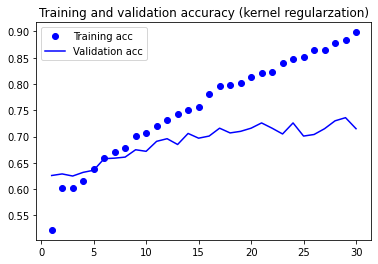

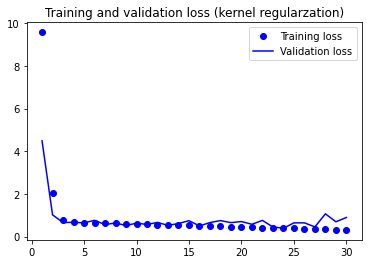

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy (kernel regularzation)')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss (kernel regularzation)')
plt.legend()
plt.show()

These two plt should be activation regularzation

Actication regularzation summary:

1. Since all the activation functions are relu, actvation regularzation might not help to solve overfitting problem.

Summary:

1. After trying different scale of regularzation, if the scale is small, overfitting problem will not be solved; if the scale is large, the model will not converge. So we need to choose a proper scale to solve this problem. Guess: a proper scale should be close to learning rate.

